In [73]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(19)
from onboard.client import OnboardClient
from onboard.client.dataframes import points_df_from_streaming_timeseries
from onboard.client.models import PointSelector, TimeseriesQuery, PointData
from datetime import datetime, timezone, timedelta
from typing import List
import pytz
from onboard.client import RtemClient
import missingno as msno
import seaborn as sns
from matplotlib.pyplot import figure
from tqdm import tqdm
from matplotlib.ticker import FormatStrFormatter
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from heatmap_fn import heatmap_sensor_and_equipment

In [2]:
building_api_key = "API_Key"
general_api_key="API_Key"
#rtem_api_key="API_Key"

In [3]:
#general_client = RtemClient(api_key=general_api_key)
#building_client = RtemClient(api_key=building_api_key)
Building_client=RtemClient(api_key=building_api_key)
general_client=RtemClient(api_key=general_api_key)

In [71]:
Buildings =  pd.json_normalize(Building_client.get_all_buildings())
Equipment = pd.json_normalize(general_client.get_equipment_types())
point_type = pd.json_normalize(general_client.get_all_point_types())
measurement_types = pd.json_normalize(general_client.get_all_measurements())

In [310]:
add = pd.read_csv(r"C:\Users\DELL\Downloads\AdditionalSensorPoints_MedOffice_NYWeatherFile.csv")

In [342]:
ele_gas = pd.read_csv(r"C:\Users\DELL\Downloads\Electricity_Gas_Meters_MedOffice_NYWeatherFile.csv")

In [136]:
ele_gas.head(5)

Date/Time  Electricity:Facility [J](TimeStep)  \
0   01/01  00:05:00                         35776881.86   
1   01/01  00:10:00                         31420308.40   
2   01/01  00:15:00                         31781267.36   
3   01/01  00:20:00                         32266320.48   
4   01/01  00:25:00                         32768111.27   

   Heating:Electricity [J](TimeStep)  Cooling:Electricity [J](TimeStep)  \
0                        22120360.92                        1166940.183   
1                        17734241.11                        1196486.530   
2                        18071015.59                        1220671.013   
3                        18554124.71                        1222615.007   
4                        19062361.96                        1216168.554   

   Fans:Electricity [J](TimeStep)  Pumps:Electricity [J](TimeStep)  \
0                     1057363.113                      2532.028235   
1                     1057363.113                      2532.028235   
2                     1057363.113                      2532.028235   
3                     1057363.113                      2532.028235   
4                     1057363.113                      2532.028235   

   Gas:Facility [J](TimeStep)  Heating:Gas [J](TimeStep)   
0                 2730359.494                 2724359.494  
1                 2331593.805                 2325593.805  
2                 2221200.062                 2215200.062  
3                 2288153.931                 2282153.931  
4                 2402754.257                 2396754.257

In [343]:
datetime_index=pd.date_range(start="2018-01-01",end="2018-12-31",periods=105120)


In [344]:
ele_gas['Date/Time']=datetime_index

In [345]:
ele_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 8 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Date/Time                           105120 non-null  datetime64[ns]
 1   Electricity:Facility [J](TimeStep)  105120 non-null  float64       
 2   Heating:Electricity [J](TimeStep)   105120 non-null  float64       
 3   Cooling:Electricity [J](TimeStep)   105120 non-null  float64       
 4   Fans:Electricity [J](TimeStep)      105120 non-null  float64       
 5   Pumps:Electricity [J](TimeStep)     105120 non-null  float64       
 6   Gas:Facility [J](TimeStep)          105120 non-null  float64       
 7   Heating:Gas [J](TimeStep)           105120 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 6.4 MB


In [346]:
ele_gas['Date/Time']=pd.to_datetime(ele_gas['Date/Time'])

In [347]:
ele_gas1=ele_gas.set_index(ele_gas.columns[0])


In [348]:
gas=ele_gas2[['Gas:Facility [J](TimeStep)','Heating:Gas [J](TimeStep) ']]

In [349]:
ele=ele_gas2[ele_gas2.columns[:-2]]

In [350]:
ele.head(1)

Electricity:Facility [J](TimeStep)  \
Date/Time                                        
2018-01-01                        8.196681e+09   

            Heating:Electricity [J](TimeStep)  \
Date/Time                                       
2018-01-01                       4.921530e+09   

            Cooling:Electricity [J](TimeStep)  Fans:Electricity [J](TimeStep)  \
Date/Time                                                                       
2018-01-01                       2.897611e+08                    2.622261e+08   

            Pumps:Electricity [J](TimeStep)  
Date/Time                                    
2018-01-01                    731756.159915

Text(0.5, 1.0, ' Electric Consumption of DOE Building')

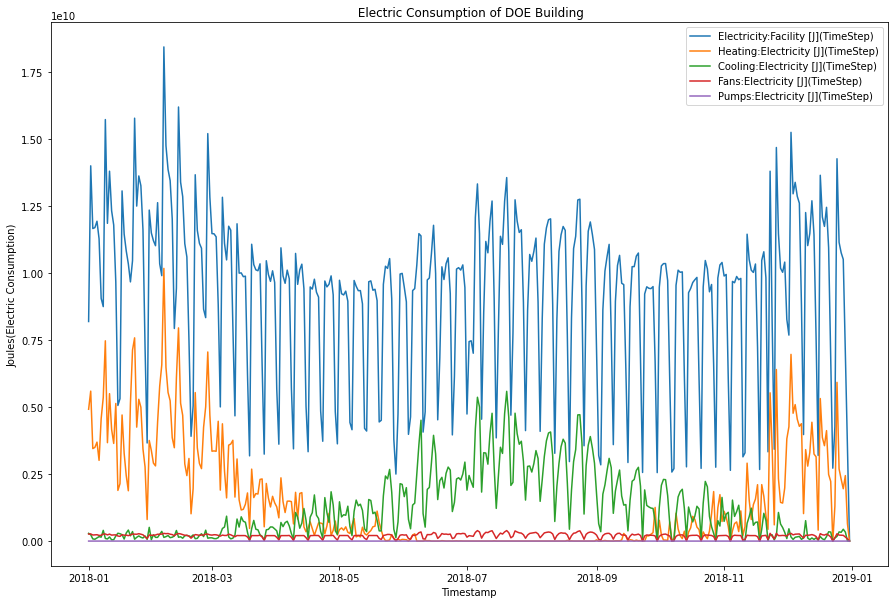

In [360]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(ele)
plt.xlabel('Timestamp')
plt.ylabel('Joules(Electric Consumption)')
plt.legend(['Electricity:Facility [J](TimeStep)','Heating:Electricity [J](TimeStep)','Cooling:Electricity [J](TimeStep)','Fans:Electricity [J](TimeStep)','Pumps:Electricity [J](TimeStep)'])
plt.title(' Electric Consumption of DOE Building')

In [180]:
gas.head(1)

Gas:Facility [J](TimeStep)  Heating:Gas [J](TimeStep) 
Date/Time                                                         
2018-01-01                8.613156e+08                8.155938e+08

Text(0.5, 1.0, 'Gas for DOE Building')

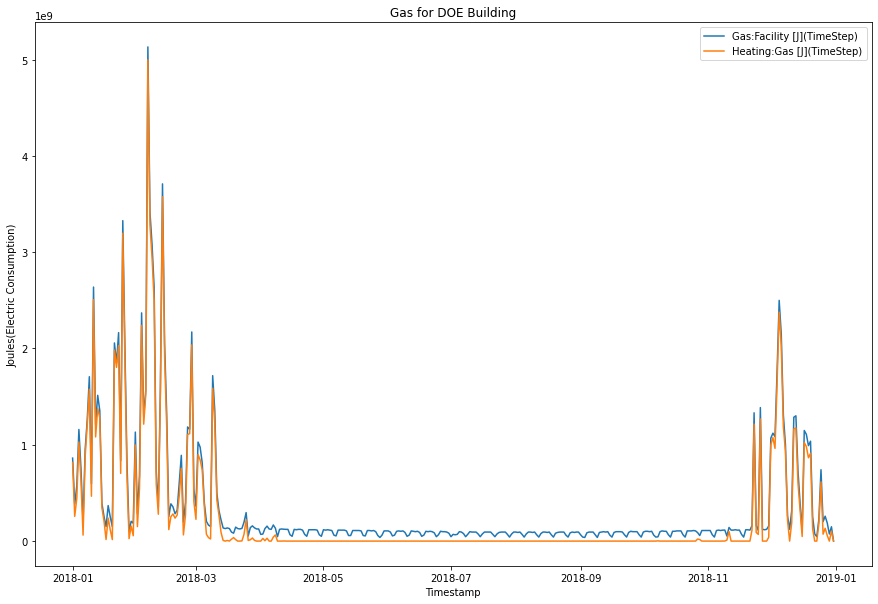

In [361]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(gas)
plt.xlabel('Timestamp')
plt.ylabel('Joules(Electric Consumption)')
plt.legend(['Gas:Facility [J](TimeStep)','Heating:Gas [J](TimeStep)'])
plt.title('Gas for DOE Building')

In [311]:
add.head(1)

Date/Time  \
0   01/01  00:05:00   

   Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)  \
0                                           3.391667                

   CORE_BOTTOM:Zone Mean Air Temperature [C](TimeStep)  \
0                                          17.200848     

   CORE_MID:Zone Mean Air Temperature [C](TimeStep)  \
0                                         15.643791   

   CORE_TOP:Zone Mean Air Temperature [C](TimeStep)  \
0                                         15.597279   

   FIRSTFLOOR_PLENUM:Zone Mean Air Temperature [C](TimeStep)  \
0                                          15.529957           

   MIDFLOOR_PLENUM:Zone Mean Air Temperature [C](TimeStep)  \
0                                          14.564867         

   PERIMETER_BOT_ZN_1:Zone Mean Air Temperature [C](TimeStep)  \
0                                           15.59688            

   PERIMETER_BOT_ZN_2:Zone Mean Air Temperature [C](TimeStep)  \
0                                          15.589625            

   PERIMETER_BOT_ZN_3:Zone Mean Air Temperature [C](TimeStep)  ...  \
0                                          15.595783           ...   

   VAV_1:Air System Outdoor Air Heat Recovery Bypass Minimum Outdoor Air Mixed Air Temperature [C](TimeStep)  \
0                                          15.494126                                                           

   VAV_2:Air System Outdoor Air Heat Recovery Bypass Minimum Outdoor Air Mixed Air Temperature [C](TimeStep)  \
0                                          14.538666                                                           

   VAV_3:Air System Outdoor Air Heat Recovery Bypass Minimum Outdoor Air Mixed Air Temperature [C](TimeStep)  \
0                                           9.713168                                                           

   Electricity:Facility [J](TimeStep)  Heating:Electricity [J](TimeStep)  \
0                         35776881.86                        22120360.92   

   Cooling:Electricity [J](TimeStep)  Fans:Electricity [J](TimeStep)  \
0                        1166940.183                     1057363.113   

   Pumps:Electricity [J](TimeStep)  Gas:Facility [J](TimeStep)  \
0                      2532.028235                 2730359.494   

   Heating:Gas [J](TimeStep)   
0                 2724359.494  

[1 rows x 65 columns]

In [356]:
add2=add1
add2.columns[57:62]

Index(['Electricity:Facility [J](TimeStep)',
       'Heating:Electricity [J](TimeStep)',
       'Cooling:Electricity [J](TimeStep)', 'Fans:Electricity [J](TimeStep)',
       'Pumps:Electricity [J](TimeStep)'],
      dtype='object')

In [357]:
dry_bulbtemp=add2['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)']
zone_mean_airtemp=add2[add2.columns[1:19]].mean(axis=1)
zone_airtemp=add2[add2.columns[19:37]].mean(axis=1)
supply_side_inlet_temp=add2[add2.columns[37:39]].mean(axis=1)
outdoor_airvolume_flow_rate=add2[add2.columns[39:54]].mean(axis=1)
Air_Heat_Recovery_Bypass_Minimum_Outdoor_Air_Mixed_Air_Temperature=add2[add2.columns[54:57]].mean(axis=1)


In [317]:
dry_bulbtemp

Date/Time
2018-01-01 00:00:00.000000000    3.391667
2018-01-01 00:04:59.180928281    2.883333
2018-01-01 00:09:58.361856562    2.375000
2018-01-01 00:14:57.542784843    1.866667
2018-01-01 00:19:56.723713125    1.358333
                                   ...   
2018-12-30 23:40:03.276286872    6.100000
2018-12-30 23:45:02.457215152    6.100000
2018-12-30 23:50:01.638143436    6.100000
2018-12-30 23:55:00.819071716    6.100000
2018-12-31 00:00:00.000000000    6.100000
Name: Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep), Length: 105120, dtype: float64

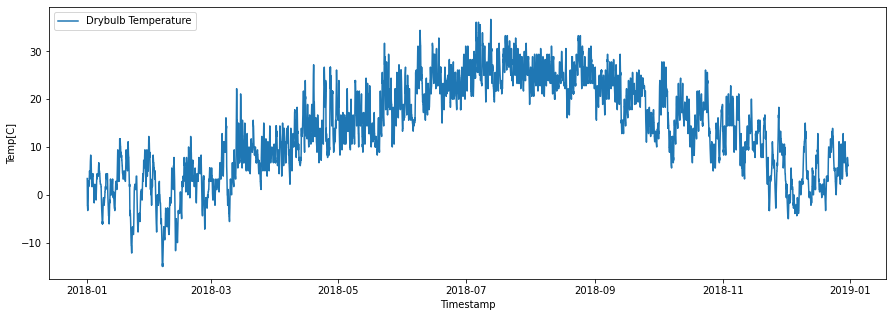

In [327]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dry_bulbtemp)
plt.xlabel('Timestamp')
plt.ylabel('Temp[C]')
plt.legend(['Drybulb Temperature'],loc ="upper left")

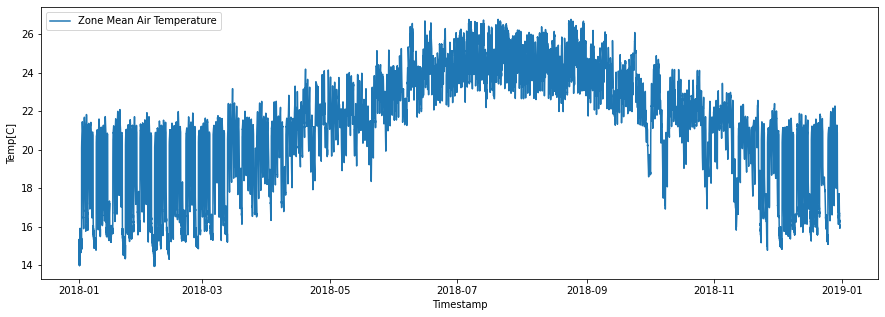

In [328]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(zone_mean_airtemp)
plt.xlabel('Timestamp')
plt.ylabel('Temp[C]')
plt.legend(['Zone Mean Air Temperature'],loc ="upper left")

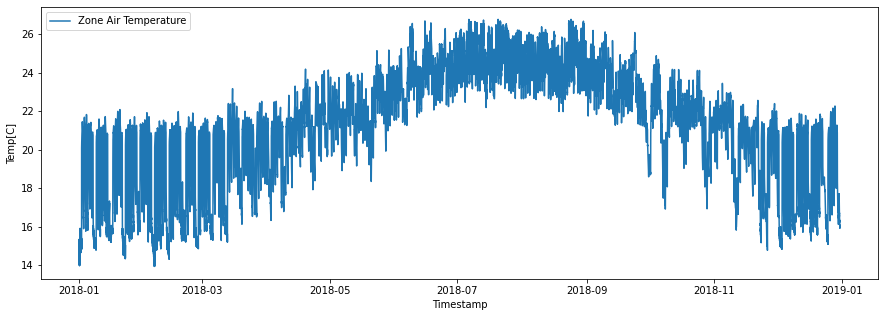

In [330]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(zone_airtemp)
plt.xlabel('Timestamp')
plt.ylabel('Temp[C]')
plt.legend(['Zone Air Temperature'],loc ="upper left")

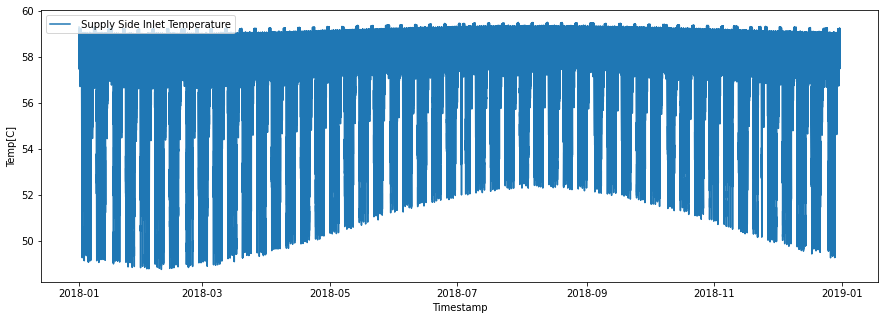

In [332]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(supply_side_inlet_temp)
plt.xlabel('Timestamp')
plt.ylabel('Temp[C]')
plt.legend([' Supply Side Inlet Temperature'],loc ="upper left")

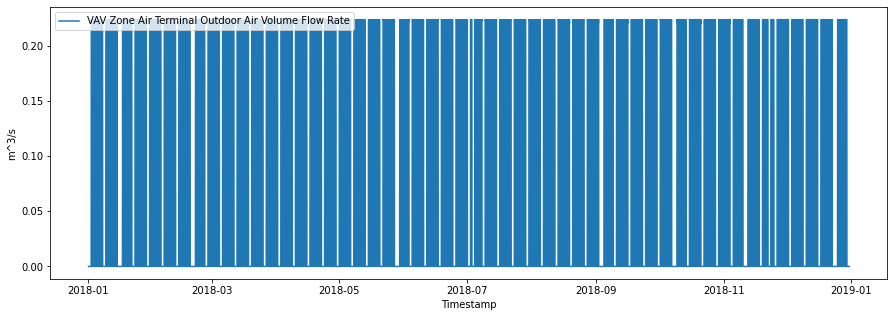

In [334]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(outdoor_airvolume_flow_rate)
plt.xlabel('Timestamp')
plt.ylabel('m^3/s')
plt.legend(['VAV Zone Air Terminal Outdoor Air Volume Flow Rate'],loc ="upper left")

In [358]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(Air_Heat_Recovery_Bypass_Minimum_Outdoor_Air_Mixed_Air_Temperature)
plt.xlabel('Timestamp')
plt.ylabel('Celsius')
plt.legend(['VAV_1:Air System Outdoor Air Heat Recovery Bypass Minimum Outdoor Air Mixed Air Temperature'],loc ="upper left")

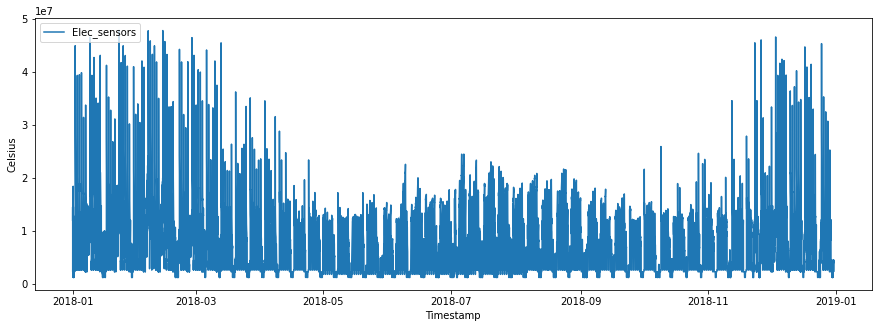

In [359]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(ele_other_sensors)
plt.xlabel('Timestamp')
plt.ylabel('Celsius')
plt.legend(['Elec_sensors'],loc ="upper left")

In [ ]:
# unique columns 1. Site Outdoor Air Drybulb Temperature  2. Zone Mean Air Temperature 3. Zone Air Temperature
# 4. Supply Side Inlet Temperature 5.VAV BOX COMPONENT:Zone Air Terminal Outdoor Air Volume Flow Rate 
# 6.VAV_1:Air System Outdoor Air Heat Recovery Bypass Minimum Outdoor Air Mixed Air Temperature
#7. 

In [77]:
add.shape

(105120, 65)

In [82]:
from onboard.client.models import PointSelector
query = PointSelector()
query.buildings= list(Buildings[Buildings['info.customerType']=='Commercial Office']['id'])
selection = Building_client.select_points(query)
a=selection['equipment_types']
b=selection['point_types']


In [83]:
multi_equ=[]
for i in a:
    eq=Equipment[Equipment['id']==i]['tag_name'].values[0]
    multi_equ.append(eq)

In [84]:
multi_sens=[]
for i in b:
    pt=point_type[point_type['id']==i]['tag_name'].values[0]
    multi_sens.append(pt)

total number of sensors for building chiller and equipment chiller combo is 1


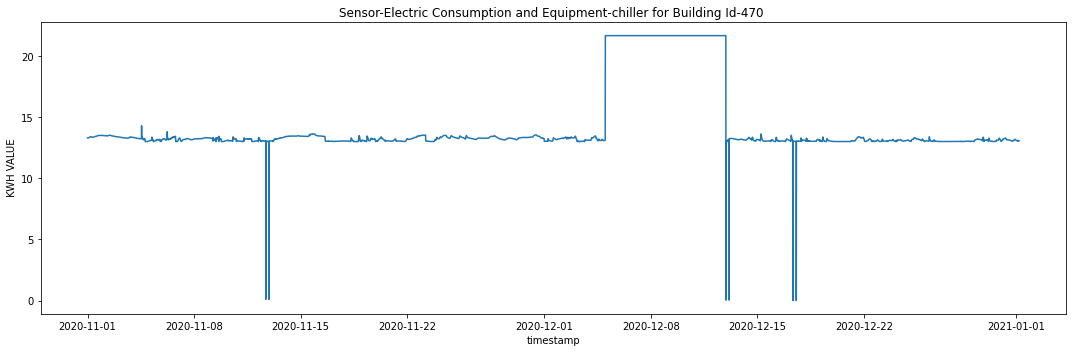

total number of sensors for building ahu and equipment ahu combo is 1


total number of sensors for building panel and equipment panel combo is 1


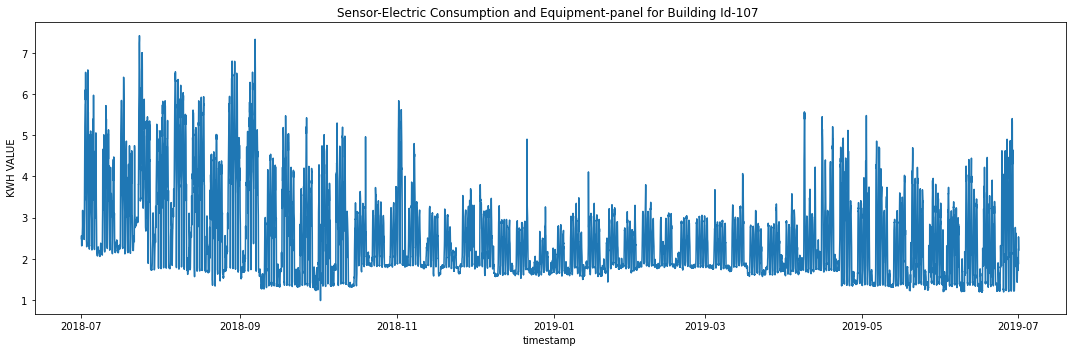

total number of sensors for building site and equipment site combo is 1


total number of sensors for building chiller and equipment chiller combo is 1


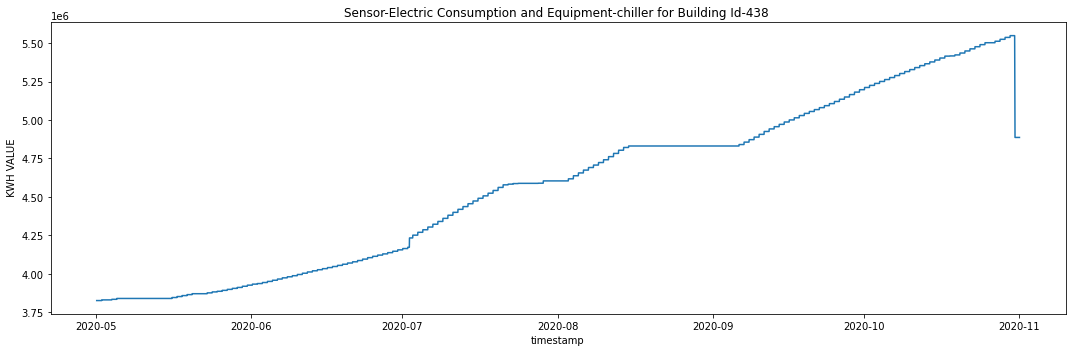

total number of sensors for building meter and equipment meter combo is 1


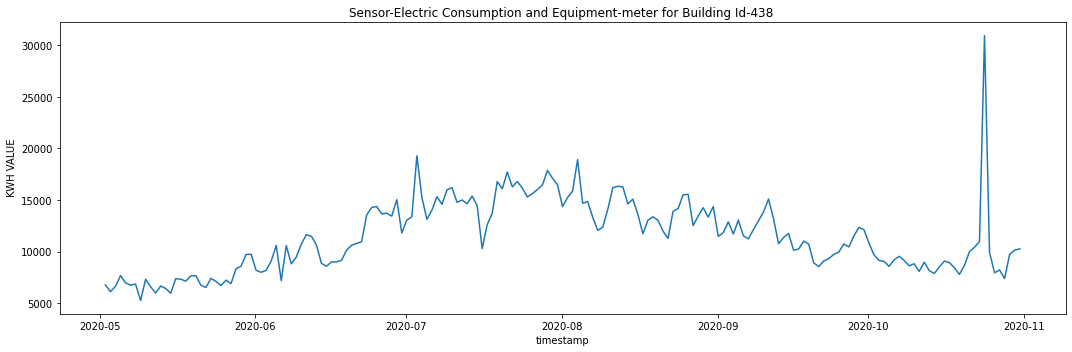

total number of sensors for building pump and equipment pump combo is 1


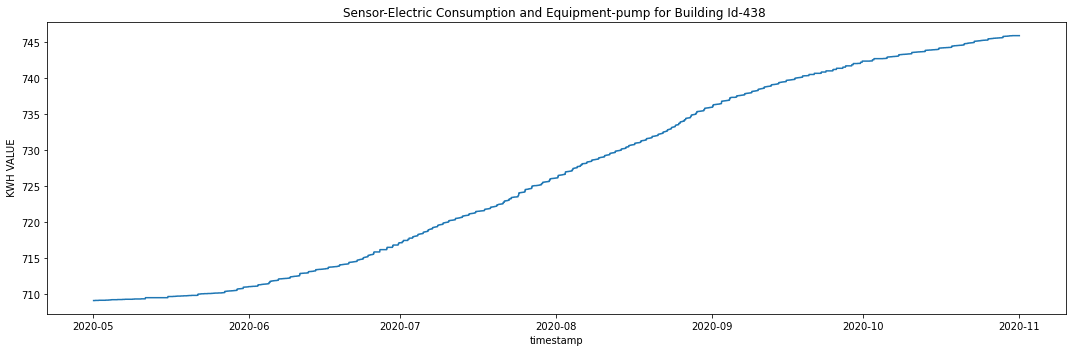

total number of sensors for building meter and equipment meter combo is 1


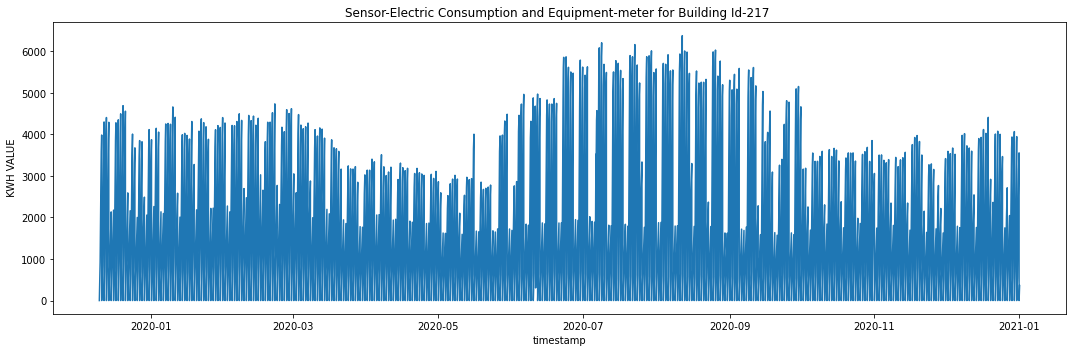

total number of sensors for building meter and equipment meter combo is 1


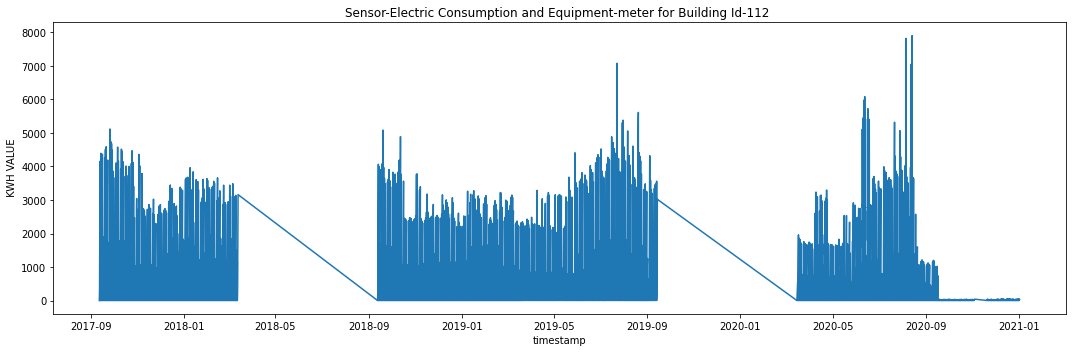

total number of sensors for building meter and equipment meter combo is 1


total number of sensors for building site and equipment site combo is 1


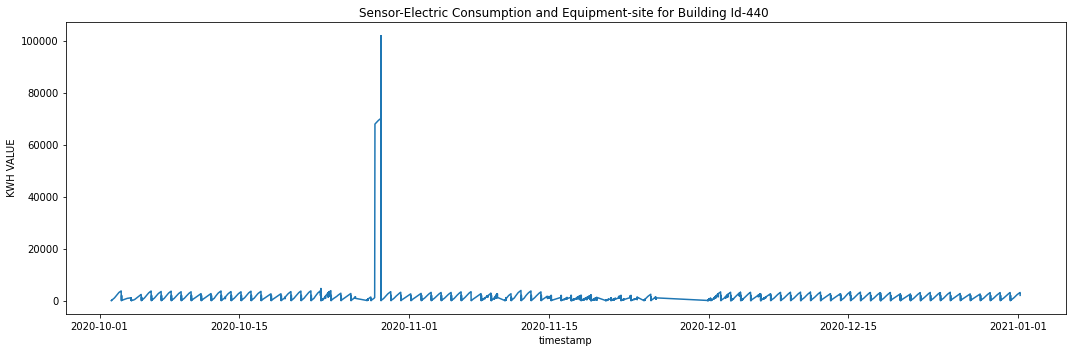

total number of sensors for building meter and equipment meter combo is 1


total number of sensors for building meter and equipment meter combo is 1


total number of sensors for building meter and equipment meter combo is 1


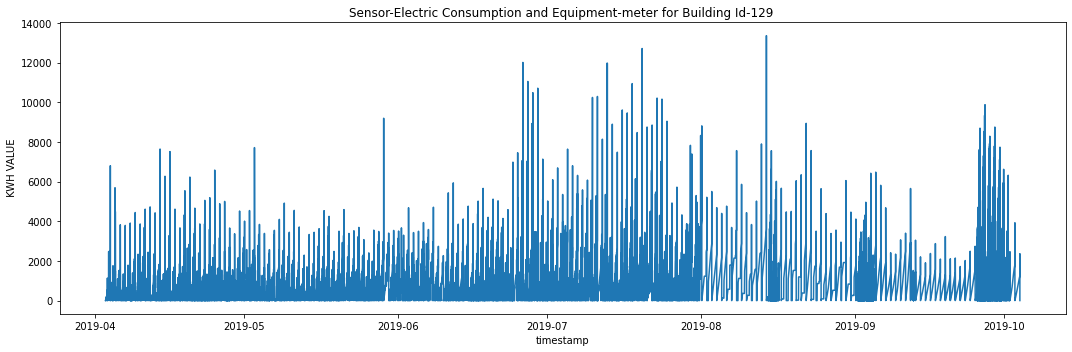

total number of sensors for building site and equipment site combo is 1


total number of sensors for building ahu and equipment ahu combo is 1


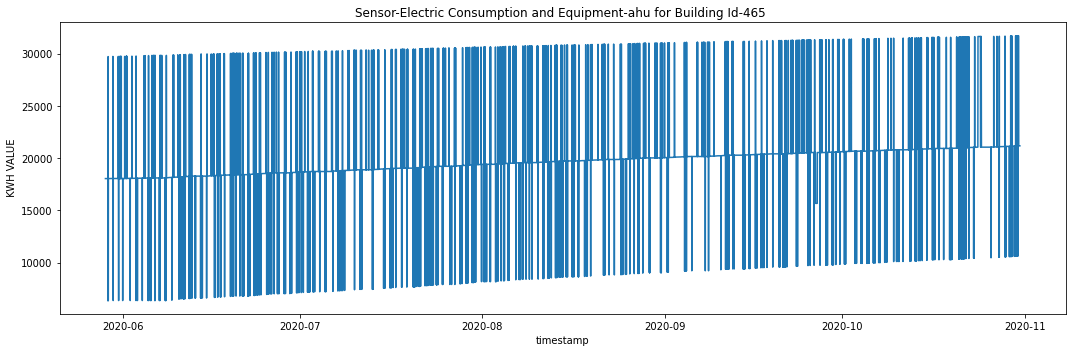

total number of sensors for building meter and equipment meter combo is 1


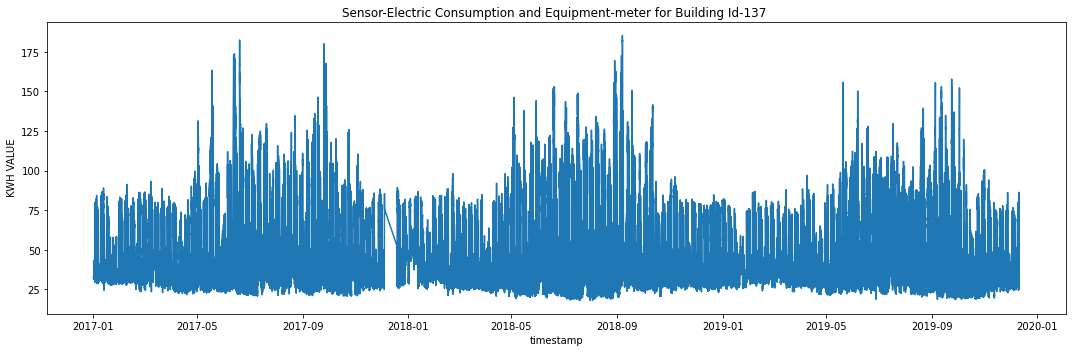

total number of sensors for building meter and equipment meter combo is 1


total number of sensors for building meter and equipment meter combo is 1


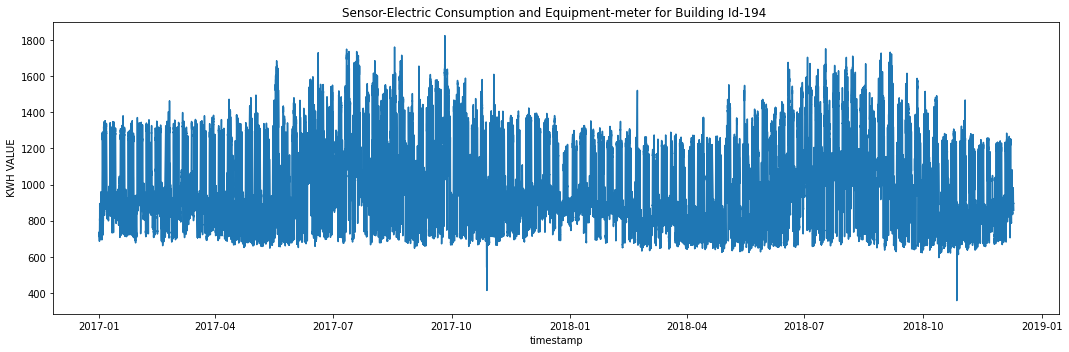

total number of sensors for building meter and equipment meter combo is 1


total number of sensors for building meter and equipment meter combo is 1


total number of sensors for building meter and equipment meter combo is 1


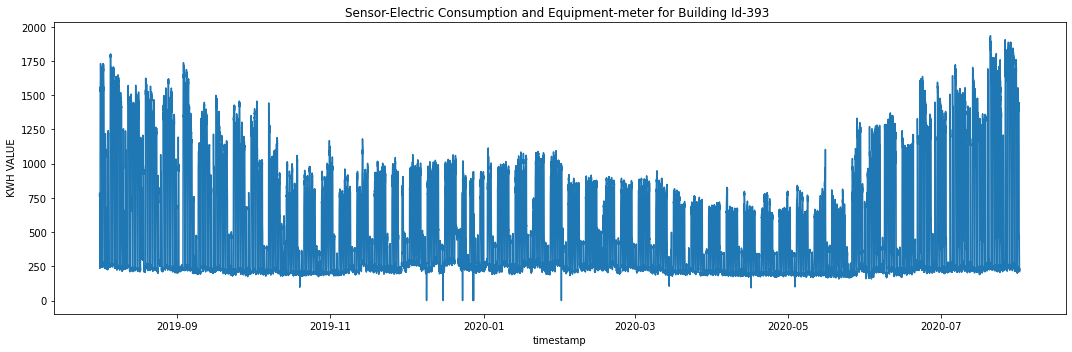

total number of sensors for building ahu and equipment ahu combo is 1


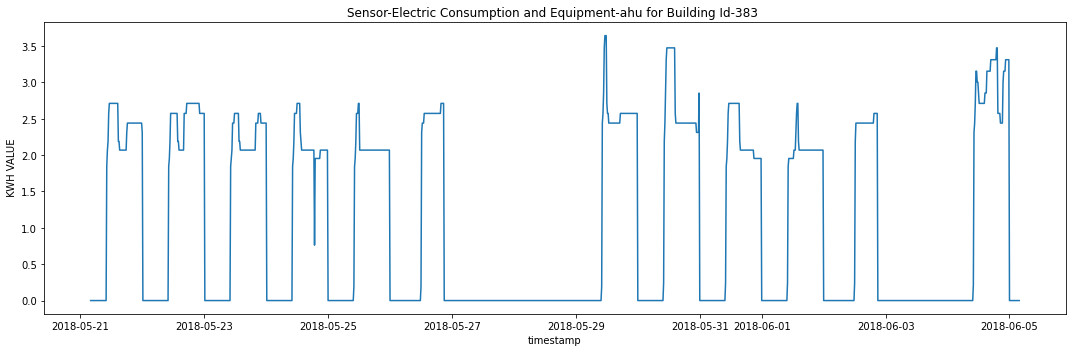

total number of sensors for building chiller and equipment chiller combo is 1


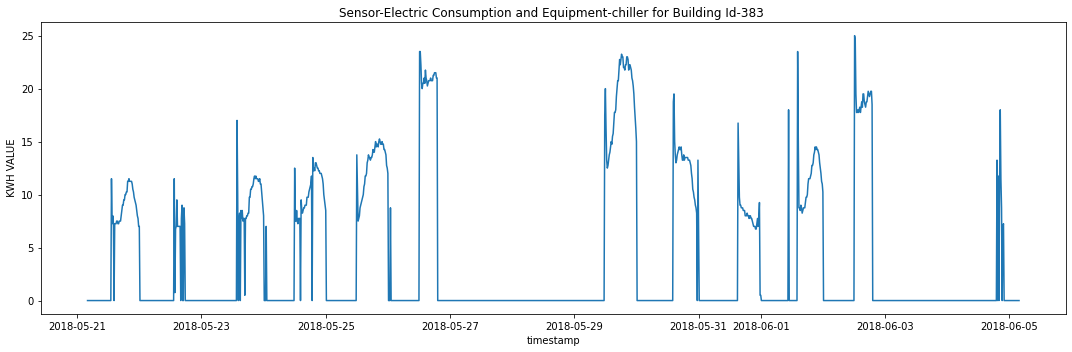

total number of sensors for building pump and equipment pump combo is 1


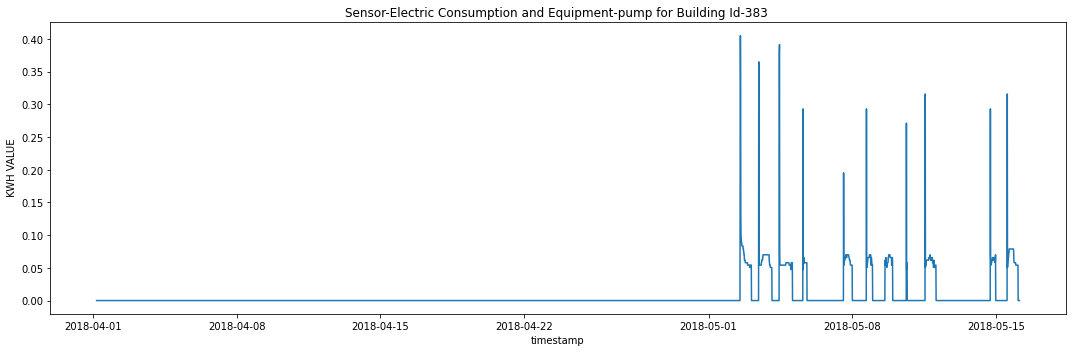

In [367]:
sensor='Electric Consumption'
query = PointSelector()
scaler = MinMaxScaler()
start = datetime(2012, 1, 1,00,00,00)
end = datetime(2021, 1, 1,00,00,00)
timezone = pytz.timezone("America/New_York")
start = timezone.localize(start)
end = timezone.localize(end)
for j in list(Buildings[Buildings['info.customerType']=='Commercial Office']['id']):
    building_id=j
    for i in multi_equ:
        equipment=i
        query.buildings=[building_id]
        query.equipment_types = [equipment]
        query.point_types=[sensor]
        selection = Building_client.select_points(query)
        if len(selection['point_types'])>0:
            print(f'total number of sensors for building {i} and equipment {equipment} combo is',len(selection['point_types']))
            timeseries_query = TimeseriesQuery(point_ids = selection['points'], start = start, end = end)
            sensor_data = points_df_from_streaming_timeseries(Building_client.stream_point_timeseries(timeseries_query))
            sensor_data1=pd.DataFrame(sensor_data)
            sensor_data2=sensor_data1.rename(columns={ 'timestamp':'MultiFamily'})
            sensor_data2['MultiFamily']=pd.to_datetime(sensor_data2['MultiFamily'])
            sensor_data3=sensor_data2.set_index(sensor_data2.columns[0])
            sensor_data3=sensor_data3.mean(axis=1)
            sensor_data5=pd.DataFrame(sensor_data3)
            sensor_data5.index=sensor_data3.index 
            sensor_data6=sensor_data5.rename(columns={ sensor_data5.columns[0]:'timestamp'})
            fig, ax = plt.subplots(figsize=(15,5))
            plt.plot(sensor_data6['timestamp'])
            plt.xlabel('timestamp')
            plt.ylabel(' KWH VALUE')
            plt.title(f"Sensor-{sensor} and Equipment-{i} for Building Id-{building_id} ")
            plt.tight_layout()
            plt.show()